<a href="https://colab.research.google.com/github/richardrt13/Data-Science-Portifolio/blob/main/Explora%C3%A7%C3%A3o_de_dados_e_correla%C3%A7%C3%A3o_com_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos trabalhar com um dataset retirado do Kaggle: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Esse conjunto de dados contém detalhes dos clientes de um banco e a variável alvo
é uma variável binária que reflete o fato se o cliente saiu do banco
(fechou sua conta) ou ele continua sendo um cliente.

In [33]:
#importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
#Lendo o arquivo
file_name = "https://raw.githubusercontent.com/richardrt13/Data-Science-Portifolio/main/Churn_Modelling.csv"
df = pd.read_csv(file_name)

In [36]:
#Visualizando as 5 primeiras linhas
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# tamanho do dataframe: linhas e colunas
df.shape 

(10000, 13)

#Significado das colunas

CustomerId: Identificação do cliente

Surname: Sobrenome

CreditScore: Score do cliente no banco

Geography: país

Gender: Gênero

Age: Idade

Tenure: Número de imóveis/patrinômio

Balance: Saldo

NumOfProducts: Número de produtos/contas do banco que o cliente assina

HasCrCard: Se o cliente tem cartão de crédito do banco

IsActiveMember: Se o cliente é ativo

EstimatedSalary: Salário estimado

Exited: Informação se o cliente saiu do banco

In [5]:
#Identificando o tipo de cada coluna
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#Apresentando uma rápida descriação estatística do conjunto de dados
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Supondo que estamos trabalhando em um projeto de identificação/predição de churn, que são os clientes que fecharam sua conta, abaixo vamos responder algumas perguntas e resolver alguns problemas que nos ajudarão na análise.

## Temos alguma coluna irrelevante para a análise?

A coluna 'RowNumber' não é relevante para a análise e podemos exclui-la.

In [10]:
df.drop(columns='RowNumber', inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##Temos alguma informação faltando?

In [12]:
#Identificando quantos "nulos" temos no nosso conjunto de dados
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Temos informação de um mesmo cliente (CustomerId) em mais de uma linha?

In [14]:
len(df['CustomerId'].drop_duplicates())

10000

Como o número de clientes, removendo os repetidos, é igual ao número de linhas do dataframe, sabemos que as informações de um cliente estão consolidadas em apenas uma linha. Ou seja, não temos repetição de um mesmo CustomerId em mais de uma linha do dataframe.

## Qual é a distribuição de clientes por país?

In [15]:
#Verificando o número de valores únicos na coluna "Geography"
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
#Contando os valores
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
#Calculando em porcetagem
df['Geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

Text(0, 0.5, '% de clientes')

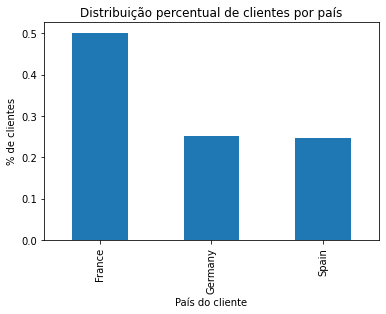

In [18]:
#Visualizando em um gráfico
df['Geography'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribuição percentual de clientes por país')
plt.xlabel('País do cliente')
plt.ylabel('% de clientes')

## Qual é a distribuição de clientes por gênero?

Text(0, 0.5, '% de clientes')

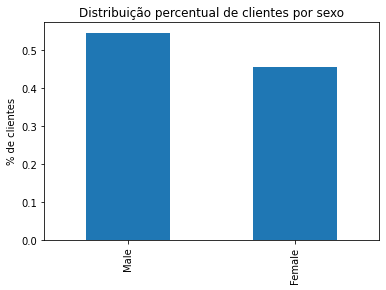

In [19]:
df['Gender'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribuição percentual de clientes por sexo')
plt.xlabel('')
plt.ylabel('% de clientes')

## Qual a distribuição de clientes por idade?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


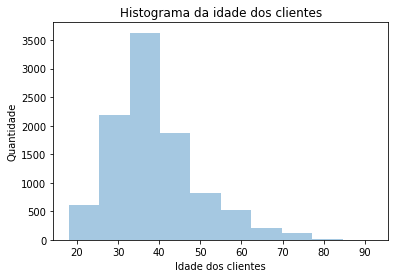

In [21]:
#Diferente dos dois ultimos gráficos, utilizaremos um histograma pela facilidade que esse tem de lidar com mais labels
sns.distplot(df['Age'], kde=False, bins=10)
plt.title('Histograma da idade dos clientes')
plt.xlabel('Idade dos clientes')
plt.ylabel('Quantidade');

## Quantos clientes da base de dados cancelaram a conta?

0    0.7963
1    0.2037
Name: Exited, dtype: float64


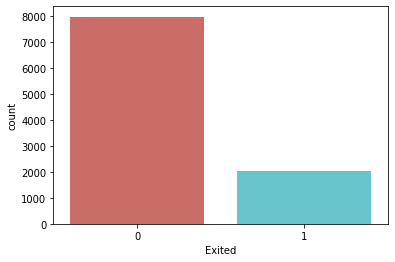

In [22]:
#Onde "0 = Não" e "1 = Sim"
print(df['Exited'].value_counts(normalize=True))
sns.countplot(x='Exited', data=df, palette='hls')

## Quantos clientes possuem cartão?

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64


Text(0, 0.5, 'quantidade de clientes')

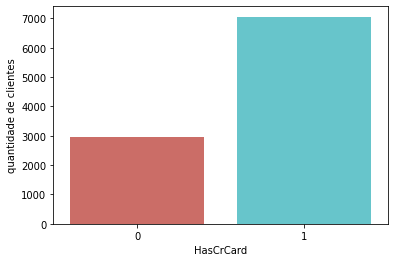

In [23]:
#Onde "0 = Não" e "1 = Sim"
print(df['HasCrCard'].value_counts(normalize=True))
sns.countplot(x='HasCrCard', data=df, palette='hls')
plt.xlabel('HasCrCard')
plt.ylabel('quantidade de clientes')

É possível fazer de outra maneira

In [24]:
df_count = (df['HasCrCard'].value_counts(normalize=True)
            .reset_index()
            .rename(columns={'index':'HasCrCard', 'HasCrCard':'% clientes'}))

df_count

,HasCrCard,% clientes
0,1,0.7055
1,0,0.2945


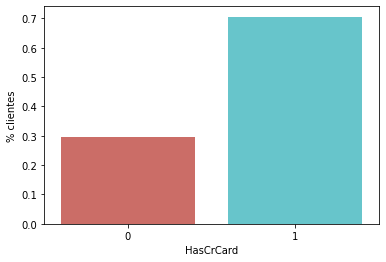

In [25]:
sns.barplot(x='HasCrCard', y='% clientes', data=df_count, palette='hls')

##Agora vamos procurar quais são as features mais correlacionadas com a informação de cancelamento da conta ('Exited').

In [29]:
#Visualizando a correlação geral do nosso conjunto de dados
df.corr()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


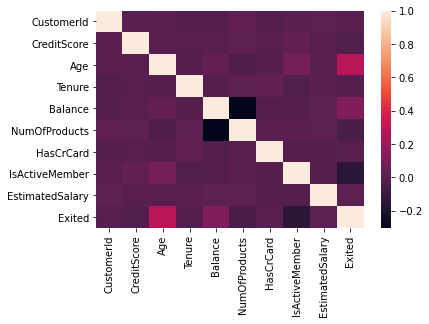

In [30]:
sns.heatmap(df.corr())

In [31]:
#Correlação com a feature "Exited" (Cancelamento)
cor_target = df.corr()
df_target = cor_target[['Exited']]
df_target

,Exited
CustomerId,-0.006248
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097
Exited,1.000000


Tornando ainda mais visual

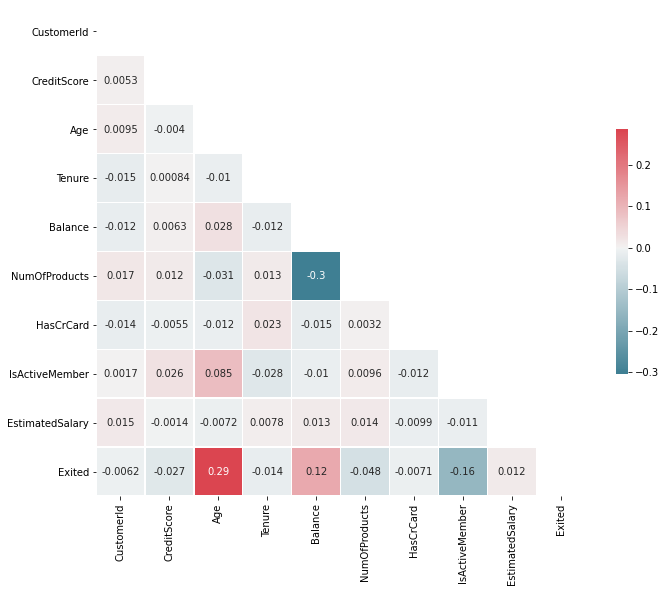

In [34]:
# ajusta o tamanho do gráfico
f, ax = plt.subplots(figsize=(11, 9))

# calcula a correlação entre as variáveis numéricas do dataset
corr = df.corr()

# cria uma máscara com zeros para o triângulo superior da matriz de correlação
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# escolhe as cores para o gráfico
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# cria o mapa de calor da matriz de correlação
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)

Com isso temos uma noção de que a Idade possui uma correlação positiva com o cancelamento do produto, ou seja, conforme a idade aumenta, o cancelamento também aumenta. 

Em contra partida, percebemos uma correlação negativa com a feature "IsActiveMember" (Se o cliente é ativo), isso significa que conforme essa variável diminui o cancelamento aumenta. 

Conclusão: Conseguimos extrair diversas informações relaventes para o negócio e também identificar quais delas possuem mais impacto (Correlaçao) com o Churn